# Azted G-dDT Test Run

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import os
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt

import plotly.io as pio
pio.renderers.default = "png"

In [2]:
from aztec_gddt.experiment import standard_run

sim_df = standard_run()

/Users/seanmcowen/opt/anaconda3/envs/Aztec/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [3]:
sim_df

,subset,simulation,run,timestep,time_l1,delta_l1_blocks,advance_l1_blocks,slashes_to_provers,slashes_to_sequencers,total_rewards_provers,...,blob_gas_threshold_for_tx,proving_marketplace_usage_probability,rewards_to_provers,rewards_to_relay,gwei_to_tokens,gas_estimators,tx_estimators,slash_params,commit_bond_amount,op_costs
0,0,0,1,0,0,0,0,0,0,0.0,...,50,0.3,0.3,0.01,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0
1,0,0,1,1,1,0,0,0,0,0.0,...,50,0.3,0.3,0.01,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0
2,0,0,1,2,2,0,0,0,0,0.0,...,50,0.3,0.3,0.01,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0
3,0,0,1,3,3,0,0,0,0,0.0,...,50,0.3,0.3,0.01,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0
4,0,0,1,4,4,0,0,0,0,0.0,...,50,0.3,0.3,0.01,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,0,1,996,996,0,0,0,41,12.3,...,50,0.3,0.3,0.01,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0
997,0,0,1,997,997,0,0,0,41,12.3,...,50,0.3,0.3,0.01,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0
998,0,0,1,998,998,0,0,0,41,12.3,...,50,0.3,0.3,0.01,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0
999,0,0,1,999,999,0,0,0,41,12.3,...,50,0.3,0.3,0.01,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0


In [4]:
#sim_df.to_csv("march4_test_data.csv")

<Axes: xlabel='timestep', ylabel='time_l1'>

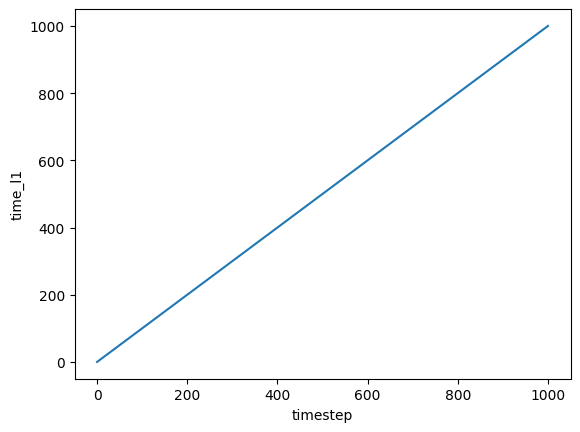

In [5]:
sns.lineplot(x=sim_df.timestep, y=sim_df.time_l1)

In [6]:
sim_df.head(4)

,subset,simulation,run,timestep,time_l1,delta_l1_blocks,advance_l1_blocks,slashes_to_provers,slashes_to_sequencers,total_rewards_provers,...,blob_gas_threshold_for_tx,proving_marketplace_usage_probability,rewards_to_provers,rewards_to_relay,gwei_to_tokens,gas_estimators,tx_estimators,slash_params,commit_bond_amount,op_costs
0,0,0,1,0,0,0,0,0,0,0.0,...,50,0.3,0.3,0.01,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0
1,0,0,1,1,1,0,0,0,0,0.0,...,50,0.3,0.3,0.01,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0
2,0,0,1,2,2,0,0,0,0,0.0,...,50,0.3,0.3,0.01,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0
3,0,0,1,3,3,0,0,0,0,0.0,...,50,0.3,0.3,0.01,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0


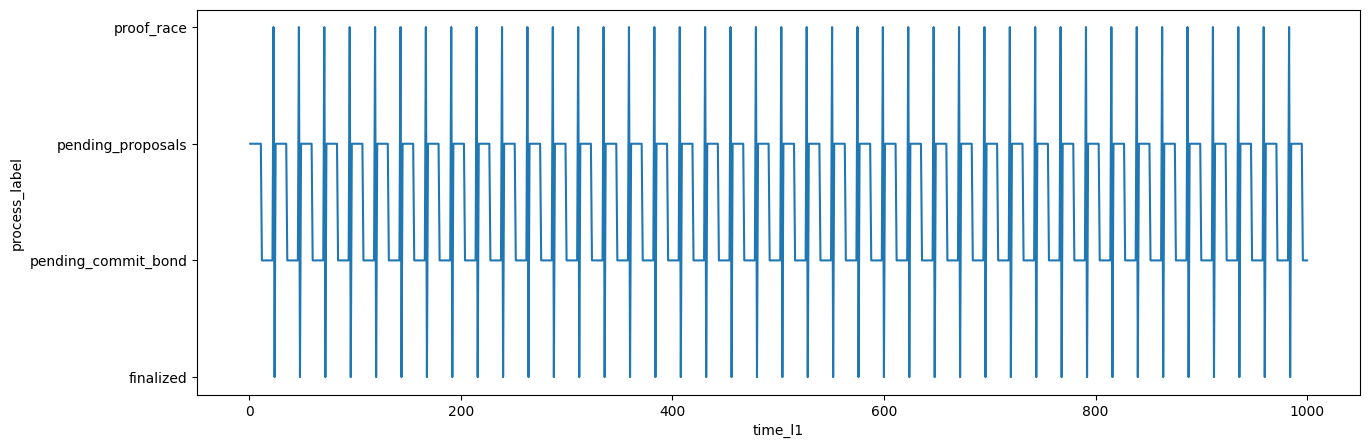

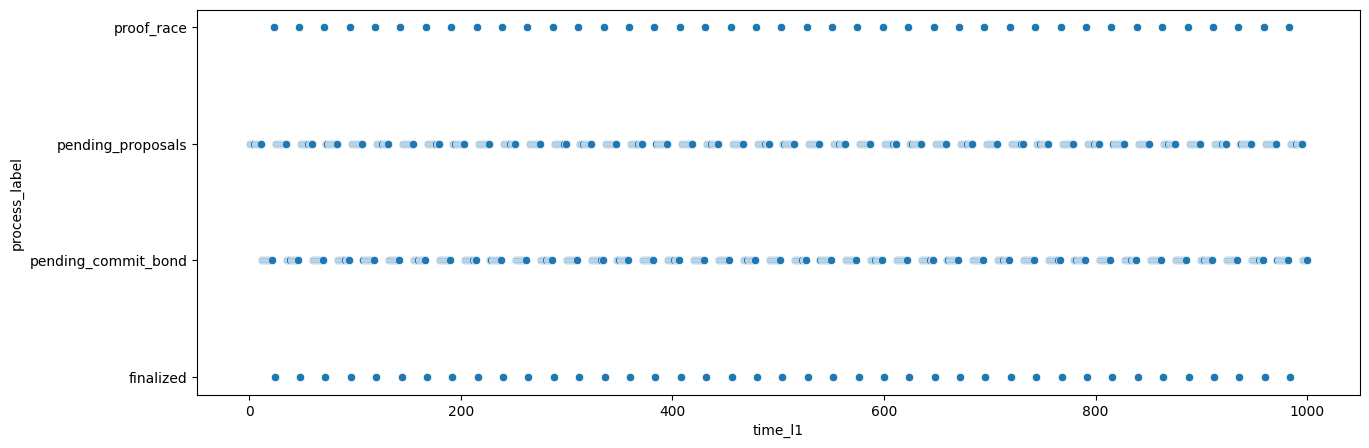

In [7]:
fig_df = sim_df.copy()
fig_df['process_order'] = fig_df.current_process.map(lambda x: x.phase.value if x is not None else None)
fig_df['process_label'] = fig_df.current_process.map(lambda x: x.phase.name if x is not None else None)
fig_df = fig_df.sort_values(['process_order', 'timestep'])#.query("time_l1 > 320 & time_l1 < 370")


plt.figure(figsize=(15, 5))
sns.lineplot(x=fig_df.time_l1, 
             y=fig_df.process_label)

plt.figure(figsize=(15, 5))
sns.scatterplot(x=fig_df.time_l1, 
             y=fig_df.process_label)
plt.show()

In [8]:
fig_df.set_index('time_l1').sort_index().process_label

time_l1
0                      None
1         pending_proposals
2         pending_proposals
3         pending_proposals
4         pending_proposals
               ...         
996     pending_commit_bond
997     pending_commit_bond
998     pending_commit_bond
999     pending_commit_bond
1000    pending_commit_bond
Name: process_label, Length: 1001, dtype: object

In [9]:
sim_df.iloc[-1]

subset                                                                                     0
simulation                                                                                 0
run                                                                                        1
timestep                                                                                1000
time_l1                                                                                 1000
delta_l1_blocks                                                                            0
advance_l1_blocks                                                                          0
slashes_to_provers                                                                         0
slashes_to_sequencers                                                                     41
total_rewards_provers                                                                   12.3
total_rewards_relays                                                  

<Axes: xlabel='time_l1', ylabel='finalized_blocks_count'>

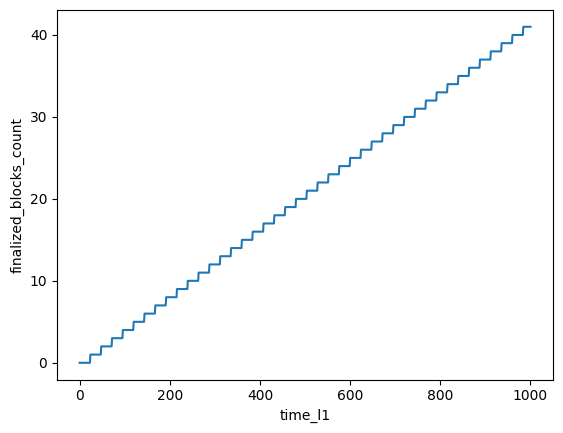

In [10]:
sns.lineplot(x=sim_df.time_l1, 
             y=sim_df.finalized_blocks_count)

<Axes: xlabel='time_l1', ylabel='cumm_block_rewards'>

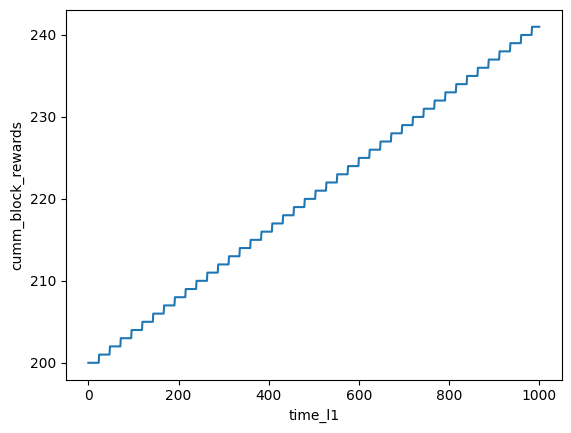

In [11]:
sns.lineplot(x=sim_df.time_l1, 
             y=sim_df.cumm_block_rewards)

In [12]:
sim_df['balance_sequencers'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.is_sequencer == True))
sim_df['balance_provers'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.is_prover == True))
sim_df['balance_relays'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.is_relay == True))
sim_df['balance_burnt'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.uuid == 'burnt'))
sim_df['balance_l1_builder'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.uuid == 'l1-builder'))


px.line(sim_df,
        x='time_l1',
        y=['balance_sequencers', 
           'balance_provers',
           'balance_relays',
           'balance_burnt',
           'balance_l1_builder'],
        log_y=True)

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


Figure({
    'data': [{'hovertemplate': 'variable=balance_sequencers<br>time_l1=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'balance_sequencers',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'balance_sequencers',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([   0,    1,    2, ...,  998,  999, 1000]),
              'xaxis': 'x',
              'y': array([300., 300., 300., ..., 300., 300., 300.]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=balance_provers<br>time_l1=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'balance_provers',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'balance_provers',
              'showlegend': True,
              'type': 

In [13]:
px.scatter(sim_df,
        x='time_l1',
        y=['gas_fee_l1', 'gas_fee_blob'])

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


Figure({
    'data': [{'hovertemplate': 'variable=gas_fee_l1<br>time_l1=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'gas_fee_l1',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'gas_fee_l1',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([   0,    1,    2, ...,  998,  999, 1000]),
              'xaxis': 'x',
              'y': array([50.,  1.,  1., ..., 18., 14., 14.]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=gas_fee_blob<br>time_l1=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'gas_fee_blob',
              'marker': {'color': '#EF553B', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'gas_fee_blob',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([   0,    1,    2, ...,  998,  999, 1000]),
              'xaxis': 'x',
       

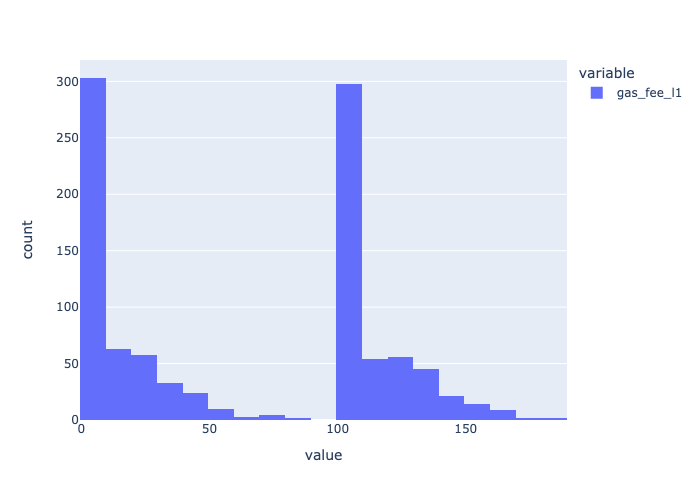

In [12]:
px.histogram(sim_df,
        x=['gas_fee_l1'])

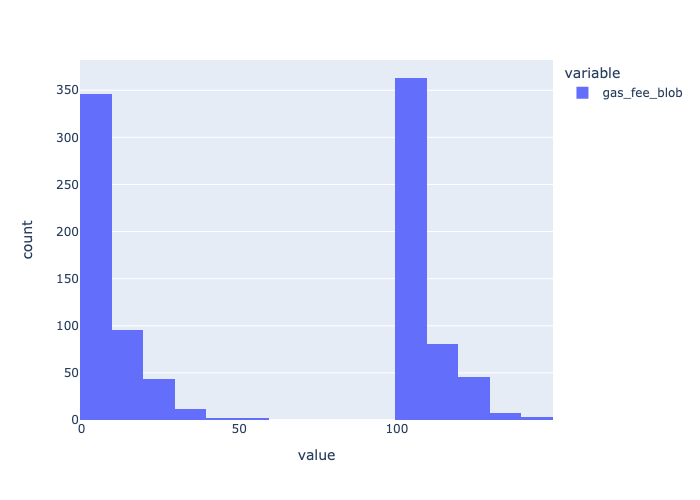

In [13]:
px.histogram(sim_df,
        x=['gas_fee_blob'])

In [14]:
sim_df.gas_fee_l1.min()

1.0